## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importing The Dataset

In [2]:
url = "datasets/training_disease.csv"
data = pd.read_csv(url)
data = data.sample(n=1000, random_state=42)


## Pre-processing Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 373 to 168
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 1.0+ MB


In [4]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
373,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
1550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hyperthyroidism,NaN
3081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AIDS,NaN
3857,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chronic cholestasis,NaN


In [5]:
data = data.drop(columns=['Unnamed: 133'], axis=1)

In [6]:
print(data.isna().sum())

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [8]:
unique_values = data['prognosis'].unique()
print(f"Unique values in prognosis [{'prognosis'}] : {unique_values}")

Unique values in prognosis [prognosis] : ['Acne' 'Hyperthyroidism' 'AIDS' 'Chronic cholestasis' 'Hypertension '
 'Hypoglycemia' 'Arthritis' 'Hepatitis B' 'Migraine'
 'Urinary tract infection' 'Diabetes ' 'Hepatitis D' 'Psoriasis'
 'Alcoholic hepatitis' 'Dimorphic hemmorhoids(piles)' 'Hepatitis E'
 'Cervical spondylosis' 'Bronchial Asthma' 'hepatitis A' 'Allergy'
 'Hepatitis C' 'Pneumonia' 'Hypothyroidism' 'Gastroenteritis'
 'Varicose veins' 'Jaundice' 'Drug Reaction'
 '(vertigo) Paroymsal  Positional Vertigo' 'Heart attack' 'Tuberculosis'
 'Typhoid' 'Common Cold' 'Peptic ulcer diseae'
 'Paralysis (brain hemorrhage)' 'Fungal infection' 'Impetigo' 'GERD'
 'Dengue' 'Malaria' 'Chicken pox' 'Osteoarthristis']


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['prognosis_encoded'] = label_encoder.fit_transform(data['prognosis'])

print(data[['prognosis', 'prognosis_encoded']].head())


                prognosis  prognosis_encoded
373                  Acne                  2
4916                 Acne                  2
1550      Hyperthyroidism                 24
3081                 AIDS                  1
3857  Chronic cholestasis                  9


In [10]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)

{'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


In [11]:
data = data.drop(columns=['prognosis'], axis=1)

In [12]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis_encoded
373,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
1550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
3081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3857,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 373 to 168
Columns: 133 entries, itching to prognosis_encoded
dtypes: int32(1), int64(132)
memory usage: 1.0 MB


## Splitting The Dataset (Base)

In [14]:
x = data.drop(columns=['prognosis_encoded'], axis=1).values
y = data['prognosis_encoded'].values

In [15]:
print("Type of x:", type(x))
print("Shape of x:", x.shape)
print("Data type of x elements:", x.dtype)
print("First 5 elements of x:\n", x[:5])

Type of x: <class 'numpy.ndarray'>
Shape of x: (1000, 132)
Data type of x elements: int64
First 5 elements of x:
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0

In [16]:
print("Type of y:", type(y))
print("Shape of y:", y.shape)
print("Data type of y elements:", y.dtype)
print("First 5 elements of y:\n", y[:5])

Type of y: <class 'numpy.ndarray'>
Shape of y: (1000,)
Data type of y elements: int32
First 5 elements of y:
 [ 2  2 24  1  9]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 132)
X_test shape: (200, 132)
y_train shape: (800,)
y_test shape: (200,)


In [19]:
print("\nX_train sample:")
print(X_train[:1])
print("\nX_test sample:")
print(X_test[:1])
print("\ny_train sample:")
print(y_train[:1])
print("\ny_test sample:")
print(y_test[:1])


X_train sample:
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

X_test sample:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

y_train sample:
[30]

y_test sample:
[24]


## Train XGBoost Model On Base Dataset

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
print(f'Best XGB parameters: {best_params_xgb}')

Best XGB parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10, 'subsample': 0.8}


In [24]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Original parameter
xgb_model = xgb.XGBClassifier(
    n_estimators=10,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(
    n_estimators=10,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

## Base Model Evaluation (XGBoost)

In [22]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-score: 1.00


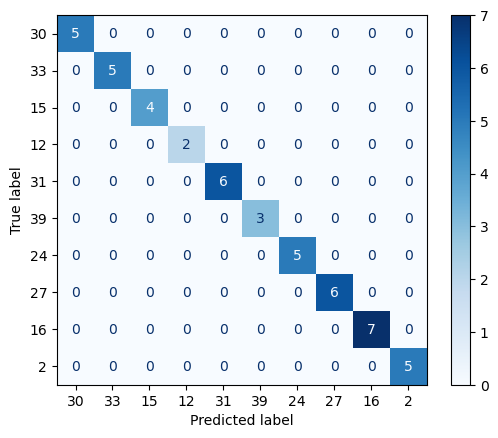

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

# Prediksi menggunakan model XGBoost
y_pred = xgb_model.predict(X_test)

# Dapatkan semua label kelas
all_classes = np.unique(y_test)

# Pilih 10 kelas acak dari semua kelas
random_classes = random.sample(list(all_classes), 10)

# Filter data uji dan prediksi berdasarkan kelas yang dipilih
y_test_filtered = [y for y in y_test if y in random_classes]
y_pred_filtered = [y for y, y_t in zip(y_pred, y_test) if y_t in random_classes]

# Buat confusion matrix hanya untuk kelas yang dipilih
cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=random_classes)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Scaling The Dataset

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = x.astype('float64')
features_scaled = scaler.fit_transform(x)

In [28]:
print("\nfeatures_scaled sample:")
print(features_scaled[:1])
print("\ny sample:")
print(y[:1])


features_scaled sample:
[[-0.37102079  2.35285948 -0.1353881  -0.21707238 -0.14285714 -0.43643578
  -0.41015156 -0.22207644 -0.22941573 -0.15343224 -0.16338312 -0.78288136
  -0.21197188 -0.15343224 -0.80970929 -0.13916893 -0.16338312 -0.13916893
  -0.21197188 -0.29488391 -0.21197188 -0.31063037 -0.16338312 -0.13916893
  -0.39336295 -0.64376017 -0.15681251 -0.34615145 -0.40848641 -0.16012815
  -0.20412415 -0.52489066 -0.49060655 -0.37969035 -0.53881591 -0.54962108
  -0.16338312 -0.22207644 -0.21958604 -0.50468321 -0.36927447 -0.29488391
  -0.16338312 -0.46534397 -0.16972503  0.         -0.15681251 -0.27645301
  -0.42008403 -0.26797642 -0.2847474  -0.15343224 -0.15343224 -0.15343224
  -0.15343224 -0.15343224 -0.41678402 -0.14645975 -0.22941573 -0.16972503
  -0.17281816 -0.16972503 -0.16972503 -0.20938323 -0.26797642 -0.15343224
  -0.15343224 -0.21197188 -0.14998296 -0.14285714 -0.14285714 -0.14645975
  -0.14645975 -0.14645975 -0.31640166 -0.16338312 -0.16338312 -0.16338312
  -0.14645975

## PCA

In [29]:
print("Features scaled shape:", features_scaled.shape)
print("Target shape:", y.shape)
print("Any NaN in features scaled:", np.isnan(features_scaled).any())
print("Any NaN in target:", np.isnan(y).any())

Features scaled shape: (1000, 132)
Target shape: (1000,)
Any NaN in features scaled: False
Any NaN in target: False


In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_base_model = xgb.XGBClassifier(**best_params_xgb, eval_metric='logloss')

# Definisikan pipeline dengan PCA dan XGBoost
pipeline_pca = Pipeline([
    ('pca', PCA()),
    ('xgb', xgb_base_model)
])

# Definisikan parameter grid untuk PCA
param_grid_pca = {
    'pca__n_components': [20, 25, 30, 35, 40, 45, 50, 55, 60]
}

# Lakukan Grid Search dengan pipeline
grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=5)
grid_search_pca.fit(features_scaled, y)

# Dapatkan parameter terbaik
best_params_pca = grid_search_pca.best_params_
print(f'Best PCA parameters: {best_params_pca}')

Best PCA parameters: {'pca__n_components': 50}


In [31]:
from sklearn.decomposition import PCA

# Inisialisasi dan transformasi dengan PCA
pca_model = PCA(n_components=50)
features_reduced_pca = pca_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {x.shape}')
print(f'PCA reduced shape: {features_reduced_pca.shape}')

Original shape: (1000, 132)
PCA reduced shape: (1000, 50)


## Splitting The Dataset (After Feature Reduced With PCA)

In [32]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(features_reduced_pca, y, test_size=0.2, random_state=42)

In [33]:
print("X_pca_train shape:", X_pca_train.shape)
print("X_pca_test shape:", X_pca_test.shape)
print("y_pca_train shape:", y_pca_train.shape)
print("y_pca_test shape:", y_pca_test.shape)

X_pca_train shape: (800, 50)
X_pca_test shape: (200, 50)
y_pca_train shape: (800,)
y_pca_test shape: (200,)


In [34]:
print("\nX_pca_train sample:")
print(X_pca_train[:1])
print("\nX_pca_test sample:")
print(X_pca_test[:1])
print("\ny_pca_train sample:")
print(y_pca_train[:1])
print("\ny_pca_test sample:")
print(y_pca_test[:1])


X_pca_train sample:
[[-3.26364848e+00  2.42815643e+00 -3.02794257e+00  3.59951957e+00
  -2.79635985e+00 -2.54506762e+00 -2.06475955e+00  1.64799517e+00
   8.98104335e-01 -5.22414263e-01 -3.58583747e+00 -1.62936055e+00
   7.23698288e+00 -4.61334095e+00  3.81164200e-01 -1.28463818e-01
   1.15061491e+00 -3.75412511e-01  6.79467053e-02 -1.33068327e+00
  -1.83763127e+00 -4.56202353e-01 -3.50125630e-01 -1.33820344e+00
  -9.41708538e-01  1.09669527e+00 -1.54029774e+00  1.03532817e+00
   5.71860513e-01 -1.82166934e+00 -1.02927055e+00  8.87732306e-01
  -8.64580816e-02  2.35092480e-01 -1.08286730e-01  1.32057720e-01
  -3.17276191e-02  4.81197838e-02  2.77669893e-02 -4.67550090e-03
   2.09050962e-02  1.93736659e-04  2.04208759e-03  4.97912311e-03
   8.14400243e-03  1.61053742e-02  8.62021232e-02  4.50725517e-02
   4.16348501e-02  3.19043616e-02]]

X_pca_test sample:
[[-3.12196009e+00  4.11112918e+00 -5.00805325e-01  3.86353829e+00
   8.89611532e-01  3.68499410e+00 -4.18012528e-01  1.61159154e+00

## Train The Model (After Feature Reduced With PCA) 

In [35]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_pca = xgb.XGBClassifier(
    n_estimators=10,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    eval_metric='logloss'
)

xgb_model_pca.fit(X_pca_train, y_pca_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
y_pca_pred = xgb_model_pca.predict(X_pca_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('XGBoost Model Performance On PCA Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On PCA Reduced Dataset
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-score: 1.00


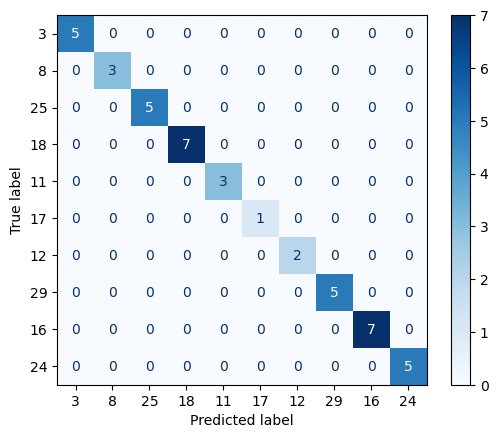

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

# Prediksi menggunakan model XGBoost
y_pred = xgb_model_pca.predict(X_pca_test)

# Dapatkan semua label kelas
all_classes = np.unique(y_pca_test)

# Pilih 10 kelas acak dari semua kelas
random_classes = random.sample(list(all_classes), 10)

# Filter data uji dan prediksi berdasarkan kelas yang dipilih
y_test_filtered = [y for y in y_test if y in random_classes]
y_pred_filtered = [y for y, y_t in zip(y_pred, y_test) if y_t in random_classes]

# Buat confusion matrix hanya untuk kelas yang dipilih
cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=random_classes)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## UMAP

In [37]:
features_scaled_noisy = features_scaled + np.random.normal(0, 0.01, features_scaled.shape)

In [38]:
import umap.umap_ as umap
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_base_model = xgb.XGBClassifier(**best_params_xgb, eval_metric='logloss')

# Definisikan pipeline dengan UMAP dan XGBoost
pipeline_umap = Pipeline([
    ('umap', umap.UMAP()),
    ('xgb', xgb_base_model)
])

# Definisikan parameter grid untuk UMAP dan XGBoost
param_grid_umap = {
    'umap__n_neighbors': [15, 20, 25, 30],
    'umap__n_components': [30, 40, 60],
    'umap__min_dist': [0.005, 0.1, 0.2, 0.3, 0.5],
    'umap__metric': ['euclidean', 'manhattan'],
    'umap__n_epochs': [400, 600],
    'umap__init': ['random']  
}

# Lakukan Grid Search dengan pipeline
grid_search_umap = GridSearchCV(pipeline_umap, param_grid_umap, cv=5)
grid_search_umap.fit(features_scaled, y)

# Dapatkan parameter terbaik
best_params_umap = grid_search_umap.best_params_
print(f'Best UMAP parameters: {best_params_umap}')

Best UMAP parameters: {'umap__init': 'random', 'umap__metric': 'manhattan', 'umap__min_dist': 0.5, 'umap__n_components': 60, 'umap__n_epochs': 400, 'umap__n_neighbors': 25}


In [ ]:
import umap.umap_ as umap
# Original parameter
# Inisialisasi dan transformasi dengan UMAP
umap_model= umap.UMAP(
    n_neighbors=10,
    n_components=5,
    min_dist=0.1,
    metric='euclidean'
)
features_reduced_umap = umap_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {x.shape}')
print(f'UMAP reduced shape: {features_reduced_umap.shape}')

In [39]:
import umap.umap_ as umap

# Inisialisasi dan transformasi dengan UMAP
umap_model= umap.UMAP(
    n_neighbors=25,
    n_components=60,
    min_dist=0.5,
    n_epochs=400,
    init='random',
    
    metric='manhattan'
)
features_reduced_umap = umap_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {x.shape}')
print(f'UMAP reduced shape: {features_reduced_umap.shape}')

Original shape: (1000, 132)
UMAP reduced shape: (1000, 60)


## Splitting The Dataset (After Feature Reduced With UMAP)

In [40]:
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(features_reduced_umap, y, test_size=0.2, random_state=42)

In [41]:
print("X_umap_train shape:", X_umap_train.shape)
print("X_umap_test shape:", X_umap_test.shape)
print("y_umap_train shape:", y_umap_train.shape)
print("y_umap_test shape:", y_umap_test.shape)

X_umap_train shape: (800, 60)
X_umap_test shape: (200, 60)
y_umap_train shape: (800,)
y_umap_test shape: (200,)


In [42]:
print("\nX_umap_train sample:")
print(X_umap_train[:1])
print("\nX_umap_test sample:")
print(X_umap_test[:1])
print("\ny_umap_train sample:")
print(y_umap_train[:1])
print("\ny_umap_test sample:")
print(y_umap_test[:1])


X_umap_train sample:
[[ 8.435307    7.311868    8.345021    1.2888621   8.844594    3.8597064
   1.2468503   2.3506615   9.610474    2.3620265  -1.7716695   3.419522
   5.1526957   3.122774    3.0339296   4.304243    6.942215    8.005566
   8.635022   -0.29474086  7.0938435   6.6713734   2.6904871   0.67659175
   3.6082592   5.166375    8.313477    8.382269    5.0272217   8.899258
   3.4011266  -1.4362956   8.438149    5.6343317   2.3875268   2.653238
   4.7807374   2.0931377   9.390582    7.252957    2.760521    7.0507836
   5.710285    4.0048046   4.623668    0.05757983  6.7586803   9.324443
   5.3252516   5.9796143   7.090024    3.3658826   0.849271    5.884467
   8.9098625   1.4338762   6.450592    6.471862    5.573898    2.6949835 ]]

X_umap_test sample:
[[ 6.6365666  3.132373  10.252778   0.6563589  7.1533947  7.883296
   1.2371025  2.0441086  3.8103328  8.35609    5.198069   9.104941
   5.8140745  4.5030746  4.2139792  3.5921824  6.107445   8.201479
   7.063372   3.4028502  2.4

## Train The Model (After Feature Reduced With UMAP) 

In [43]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_umap = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.6,
    eval_metric='logloss'
)

xgb_model_umap.fit(X_umap_train, y_umap_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
y_umap_pred = xgb_model_umap.predict(X_umap_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('XGBoost Model Performance On UMAP Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On UMAP Reduced Dataset
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-score: 1.00


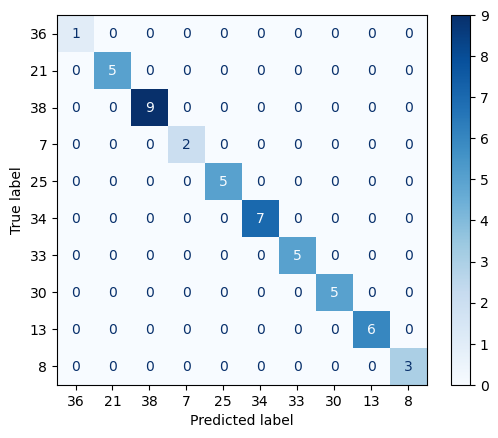

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

# Prediksi menggunakan model XGBoost
y_pred = xgb_model_umap.predict(X_umap_test)

# Dapatkan semua label kelas
all_classes = np.unique(y_umap_test)

# Pilih 10 kelas acak dari semua kelas
random_classes = random.sample(list(all_classes), 10)

# Filter data uji dan prediksi berdasarkan kelas yang dipilih
y_test_filtered = [y for y in y_test if y in random_classes]
y_pred_filtered = [y for y, y_t in zip(y_pred, y_test) if y_t in random_classes]

# Buat confusion matrix hanya untuk kelas yang dipilih
cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=random_classes)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()